# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
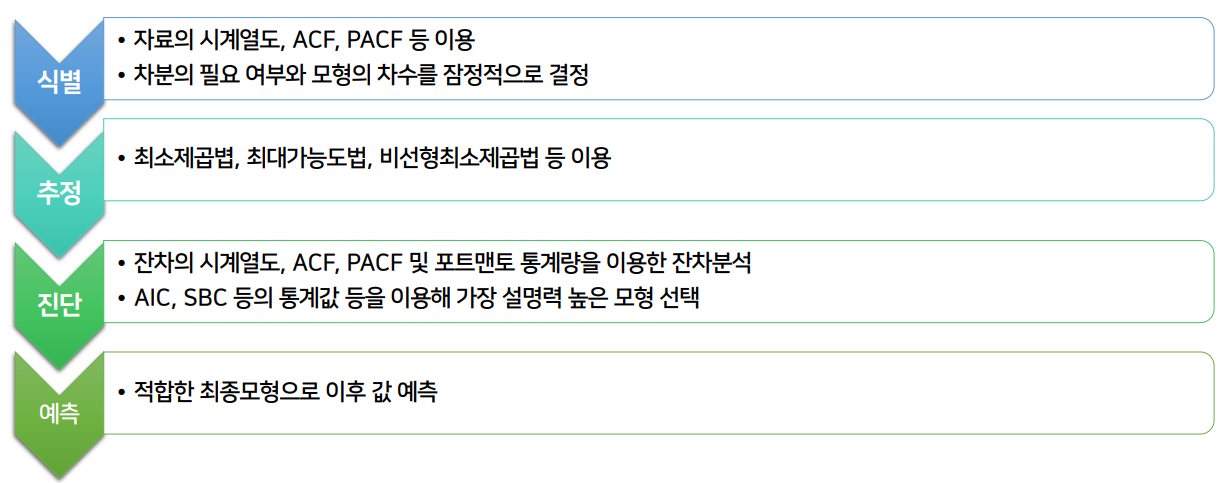

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [12]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기

In [76]:
df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

df = df[["Close"]]

df = df.reset_index()

df.columns = ['day', 'price']

df['day'] = pd.to_datetime(df['day'])

df.index = df['day']
df.set_index('day', inplace=True)

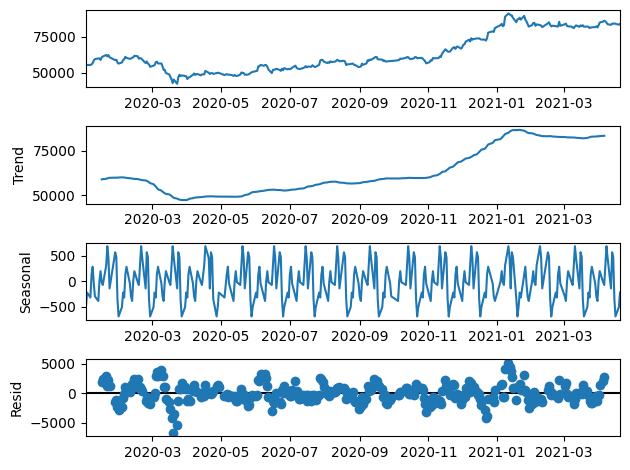

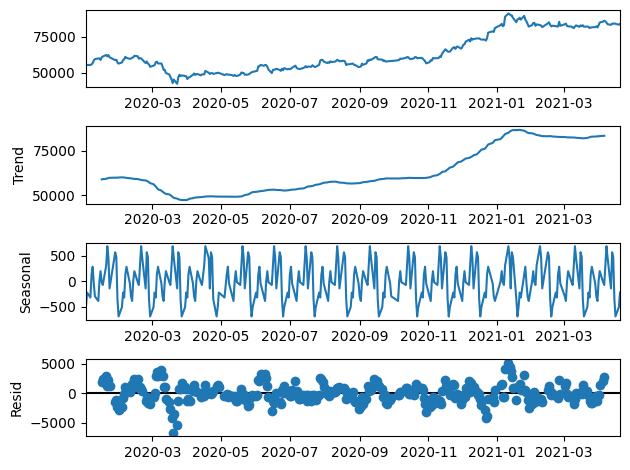

In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

a = seasonal_decompose(df, model='Multiplicative', period=20)
a.plot()

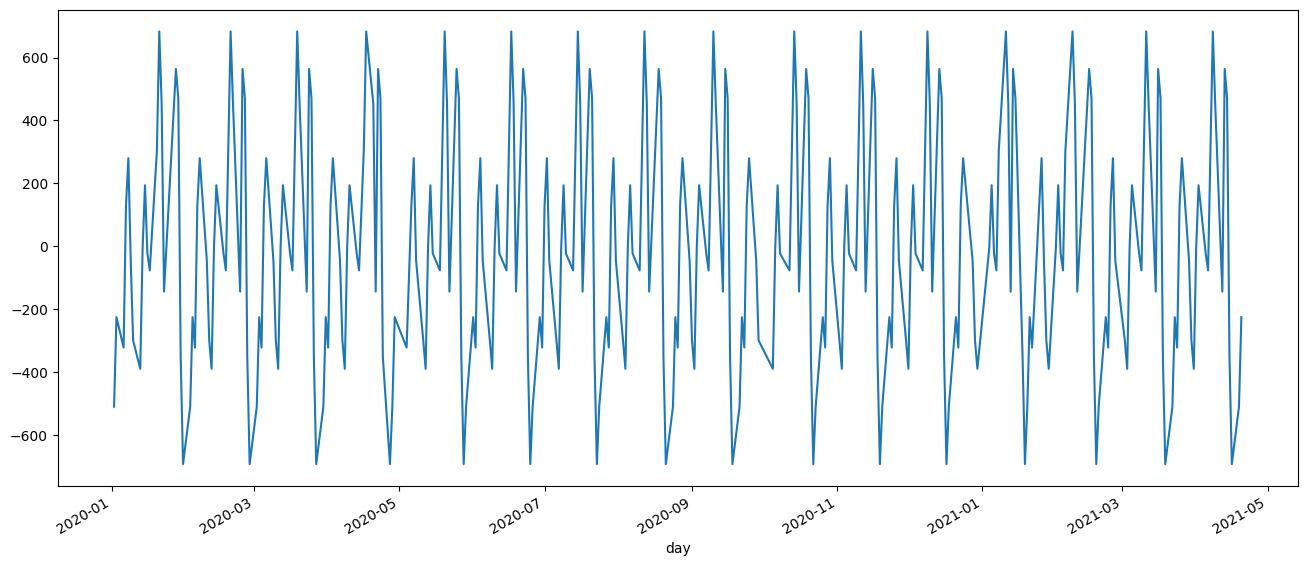

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## Arima

In [192]:
train_data = df.iloc[:len(df)-20,:]
test_data = df.iloc[len(df)-20:,:]

In [193]:
import itertools

p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq :
        try : 
            model = SARIMAX(train_data['price'], order=(i), seasonal_order = (j))
            model_fit = model.fit(disp=False)
            print(f'SARIMA : {i},{j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
            
        except Exception as e:
            print(e)
            continue

SARIMA : (0, 1, 0),(0, 1, 0, 3) >> AIC : 5305.25
SARIMA : (0, 1, 0),(0, 1, 1, 3) >> AIC : 5257.27
SARIMA : (0, 1, 0),(0, 1, 2, 3) >> AIC : 5241.51
SARIMA : (0, 1, 0),(1, 1, 0, 3) >> AIC : 5274.58
SARIMA : (0, 1, 0),(1, 1, 1, 3) >> AIC : 5232.3
SARIMA : (0, 1, 0),(1, 1, 2, 3) >> AIC : 5235.4
SARIMA : (0, 1, 0),(2, 1, 0, 3) >> AIC : 5265.18
SARIMA : (0, 1, 0),(2, 1, 1, 3) >> AIC : 5235.39
SARIMA : (0, 1, 0),(2, 1, 2, 3) >> AIC : 5243.64
SARIMA : (0, 1, 1),(0, 1, 0, 3) >> AIC : 5306.96
SARIMA : (0, 1, 1),(0, 1, 1, 3) >> AIC : 5258.91
SARIMA : (0, 1, 1),(0, 1, 2, 3) >> AIC : 5254.24
SARIMA : (0, 1, 1),(1, 1, 0, 3) >> AIC : 5278.06
SARIMA : (0, 1, 1),(1, 1, 1, 3) >> AIC : 5235.28
SARIMA : (0, 1, 1),(1, 1, 2, 3) >> AIC : 5248.47
SARIMA : (0, 1, 1),(2, 1, 0, 3) >> AIC : 5266.95
SARIMA : (0, 1, 1),(2, 1, 1, 3) >> AIC : 5236.15
SARIMA : (0, 1, 1),(2, 1, 2, 3) >> AIC : 5247.12
SARIMA : (0, 1, 2),(0, 1, 0, 3) >> AIC : 5308.81
SARIMA : (0, 1, 2),(0, 1, 1, 3) >> AIC : 5268.69
SARIMA : (0, 1, 2),(0,

In [194]:
best_param = params[np.argmin(AIC)]

In [199]:
model = SARIMAX(train_data['price'], order=best_param[0], seasonal_order = best_param[1])
model_fit = model.fit(disp=False)

arima_pred = model_fit.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")

<AxesSubplot: >

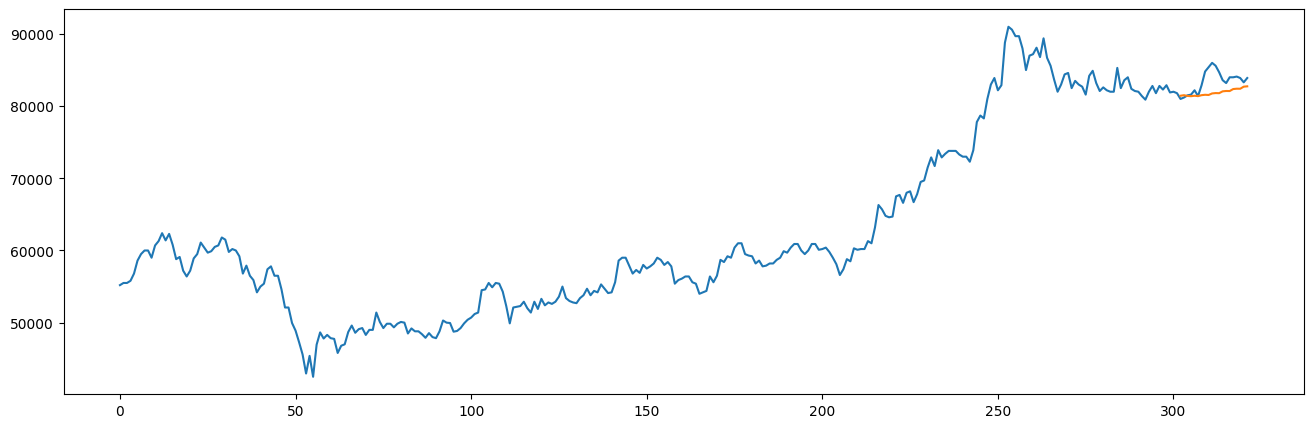

In [200]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(x=np.arange(0,len(df)),y=df['price'].values)
sns.lineplot(x=arima_pred.index, y=arima_pred.values)
